In [2]:
#imdb评价问题，二分类问题。预测正面/负面评价

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #10000个常用单词

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 599dadb1135973df5b59232a0e9a887c so we will re-download the data.
17465344/17464789 [==============================] - 165s 9us/step


In [5]:
#这段是将某个评论转换为单词

word_index = imdb.get_word_index() #word_index是一个将单词映射到整数的字典
reverse_word_index = dict(
[(value,key) for (key,value) in word_index.items()] #键值颠倒，将整数索引映射为单词
)
decoded_review = " ".join(
[reverse_word_index.get(i-3, "?") for i in train_data[0]] #将评论解码，减3是去掉无关词的索引
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
#构建数据，涉及到one-hot型矩阵的构建

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #创建一个形状为(len(sequences), dimension)的零矩阵
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1 #将results[i]的指定索引设为1,即升维后，将有单词对应索引的数字作为索引，该位置的值设为1
    return results

#将训练和测试数据向量化
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
#x_train[0]
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [11]:
#建模

from keras import models
from keras.layers import Dense

model = models.Sequential()
model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#编译(默认参数)

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#自定义配置优化器

from keras import optimizers

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
#自定义配置损失函数和指标

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [13]:
#对数据源划分训练集和测试集，注意这里是在原有的训练集里再次划分，以便观察迭代的合适次数

x_val = x_train[:10000]
p_x_train = x_train[10000:]

y_val = y_train[:10000]
p_y_train = y_train[10000:]

In [14]:
#训练

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    p_x_train,
    p_y_train,
    epochs=20, #样本训练20次
    batch_size=512, #每批次样本数量
    validation_data=(x_val,y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

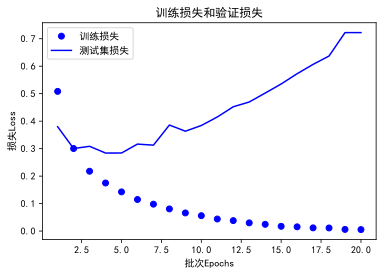

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values,'bo',label='训练损失') #bo是蓝色圆点
plt.plot(epochs, val_loss_values,'b',label='测试集损失') #b是蓝色实线
plt.title('训练损失和验证损失')
plt.xlabel('批次Epochs')
plt.ylabel('损失Loss')
plt.legend()
plt.show()

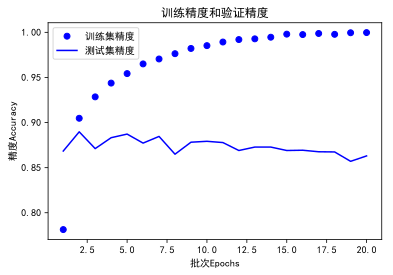

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, acc,'bo',label='训练集精度') #bo是蓝色圆点
plt.plot(epochs, val_acc,'b',label='测试集精度') #b是蓝色实线
plt.title('训练精度和验证精度')
plt.xlabel('批次Epochs')
plt.ylabel('精度Accuracy')
plt.legend()
plt.show()

In [21]:
#根据测试结果，重新训练模型

model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
          
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
          
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.4470 - acc: 0.8242
Epoch 2/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.2557 - acc: 0.9103
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.1969 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 3s 102us/step


[0.3179983378505707, 0.87512]

In [22]:
#预测评价的正负面趋势

model.predict(x_test)

array([[0.29397106],
       [0.99968123],
       [0.93757635],
       ...,
       [0.16675377],
       [0.15830684],
       [0.7685168 ]], dtype=float32)